# Cross Validation

A validação cruzada é um tópico importante no `Machine Learning 'para garantir que nosso modelo seja robusto o suficiente. A estratégia de treinamento tradicional está usando três partes do conjunto de dados para treinamento, testando uma validação.

* conjunto de treinamento - é usado para treinar o modelo e otimizar os hiperparâmetros do modelo
* conjunto de teste - é usado para avaliar se o modelo é generalizado o suficiente para funcionar corretamente com dados nos quais não foi treinado. No entanto, através da pessoa que realiza a otimização, algum conhecimento sobre o conjunto de testes acaba vazando para o modelo.
* conjunto de validação - por esse motivo, usamos o conjunto de validação que é usado como verificação final de que o modelo é capaz de generalizar com dados anteriormente desconhecidos.

A criação desses conjuntos limita o número de dados usados para o treinamento e que podem diminuir a capacidade de aprendizado do modelo. A validação cruzada permite criar um modelo robusto dividindo os dados de treinamento em subconjuntos `k`. Cada subconjunto usa parte de seus dados para treinamento e parte para teste. O próximo subconjunto usa uma divisão diferente dos dados de treino e teste, como você pode ver na figura abaixo. Isso é mais intenso nos recursos, mas permite que você use os dados do modo para treinamento.

![](Cross_Validation.jpg "Cross validation folds")

Você também pode ter certeza de que seu modelo é capaz de generalizar, caso cada dobra tenha desempenho semelhante. Se uma (ou mais) dobra estiver realmente atingindo a pontuação, enquanto outras apresentam um desempenho ruim, é necessário pensar mais na maneira como você divide os dados. Você verá exemplos disso abaixo.

O Scikit Learn é a biblioteca python favorita para executar muitas operações de aprendizado de máquina e traz muitos métodos que ajudam a dividir os dados em conjunto de treinamento, teste e validação. Os mais populares que iremos analisar neste tutorial são:

train_test_split - cria uma divisão única no conjunto de treino e teste.
* Kfold - cria divisões com dobras k, permitindo validação cruzada
* StratifiedKFold - cria divisões com dobras k considerando a distribuição da variável de destino
* cross_val_score - pontuação do modelo evaluta através da validação cruzada

No entanto, você deve estar ciente de que a validação cruzada não é adequada para todas as ocasiões e deve pensar com sabedoria como você divide os dados.

Mais sobre cross validaiton:

* https://scikit-learn.org/stable/modules/cross_validation.html
* https://en.wikipedia.org/wiki/Cross-validation_(statistics)

Vamos dar uma olhada em alguns casos reais. Primeiro, dividiremos o simples **intervalo de 25 números** e, em seguida, examinaremos o popular **conjunto de dados da íris** que usa medições de pétalas e sépalas para prever que tipo de flor de íris é.

In [1]:
# Importar scikit-learn 
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.datasets import load_iris, load_boston
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# importar bibliotecas gráficas e manipulações de dados
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

In [2]:
# cria um range 1 to 25
rn = range(1,26)

Vamos começar com o método Kfold, que divide o conjunto de trens em dobras k, para que cada amostra seja usada uma vez para testes e k-1 vezes para treinamento.

In [3]:
# para demonstrar como os dados são divididos, criaremos 3 e 5 dobras.
# A função KFold deve ser aplicada aos dados e retorna uma localização (índice) das amostras de treino e teste.

kf5 = KFold(n_splits=5, shuffle=False)
kf3 = KFold(n_splits=3, shuffle=False)

In [4]:
# a função K Fold retorna os índices dos dados. O intervalo varia de 1 a 25, portanto o índice é de 0 a 24
for train_index, test_index in kf3.split(rn):
    print(train_index, test_index)

[ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [0 1 2 3 4 5 6 7 8]
[ 0  1  2  3  4  5  6  7  8 17 18 19 20 21 22 23 24] [ 9 10 11 12 13 14 15 16]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] [17 18 19 20 21 22 23 24]


In [5]:
# para obter os valores de nossos dados, usamos np.take () para acessar um valor em um índice específico
for train_index, test_index in kf3.split(rn):
    print(np.take(rn,train_index), np.take(rn,test_index))

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25] [1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 18 19 20 21 22 23 24 25] [10 11 12 13 14 15 16 17]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] [18 19 20 21 22 23 24 25]


## Chart the cross validation split

In [6]:
# Vamos dividir nosso intervalo de testes em 5 e 3 dobras e exibir as divisões no gráfico.
# Para mostrar claramente quais dados pertencem a cada conjunto, mudaremos os valores por -.1 e +.1
# a primeira dobra conterá valores 0.9 no treino e 1.1 no conjunto de testes, segundo 1.9 e 2.1, etc.
# também daremos a cada conjunto a cor diferente
# porque repetiremos este exercício para a versão aleatória, vamos criar uma função

def kfoldize(kf, rn, shift=.1):
    train = pd.DataFrame()
    test = pd.DataFrame()
    i = 1
    for train_index, test_index in kf.split(rn):
        train_df = pd.DataFrame(np.take(rn, train_index), columns=["x"])
        train_df["val"] = i - shift
        train = train.append(train_df)

        test_df = pd.DataFrame(np.take(rn, test_index), columns=["x"])
        test_df["val"] = i + shift
        test = test.append(test_df)
        i += 1
    return train, test

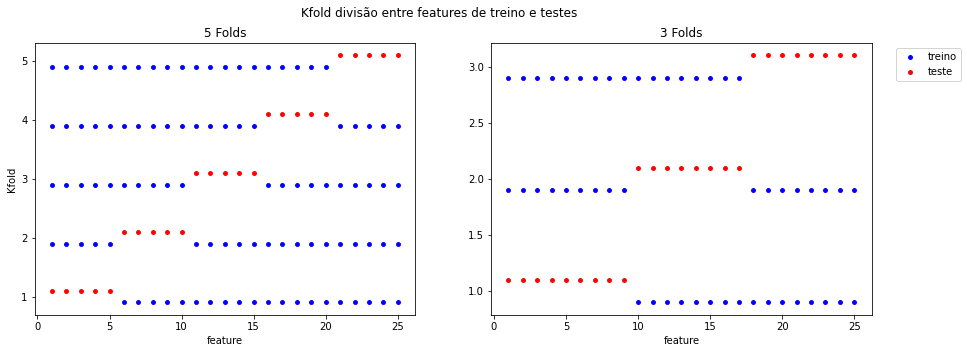

In [7]:
train5, test5 = kfoldize(kf5,rn)
train3, test3 = kfoldize(kf3,rn)

fig,ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(x="x",y="val",c="b",label="treino",s=15,data=train5)
ax[0].scatter(x="x",y="val",c="r",label="teste",s=15,data=test5)
ax[1].scatter(x="x",y="val",c="b",label="treino",s=15,data=train3)
ax[1].scatter(x="x",y="val",c="r",label="teste",s=15,data=test3)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[1].set_xlabel("feature")
ax[0].set_title("5 Folds")
ax[1].set_title("3 Folds")
plt.suptitle("Kfold divisão entre features de treino e testes")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [8]:
# vamos ter certeza de como os valores são distribuídos entre os conjuntos; Também vamos criar função para que possamos repetir
def kfold_stats(df, name):
    s =  pd.Series({"Min value: ": df["x"].min(),
              "Max value: ": df["x"].max(),
              "Min occurance: ": df["x"].value_counts().min(),
              "Max occurance: ": df["x"].value_counts().max(),
               "Min lenght": df.groupby("val").count().min().values[0],
               "Max lenght": df.groupby("val").count().max().values[0]})
    s.name = name
    return s
pd.concat([kfold_stats(train5, "Train5"), kfold_stats(test5,"Test5"),
          kfold_stats(train3, "Train3"), kfold_stats(test3,"Test3")], 
          axis=1)

,Train5,Test5,Train3,Test3
Min value:,1,1,1,1
Max value:,25,25,25,25
Min occurance:,4,1,2,1
Max occurance:,4,1,2,1
Min lenght,20,5,16,8
Max lenght,20,5,17,9


A tabela acima resume alguns fatos importantes sobre o KFold:

* `Min and Max value` - treino e teste cobrem todas as features
* `Min and Max occurrence`- cada valor ocorre uma vez no conjunto de testes e k-1 vezes no conjunto de treino
* `Min and Max value length` - caso você tenha várias features que não podem ser divididos por n, alguns terão uma divisão diferente entre os conjuntos de teste e de treino.  Por exemplo. no caso de 25 elementos e 3, divida os índices em 16/9, 17/8, 17/8



## KFold embaralhado
No exemplo anterior, você viu a distribuição de treino / teste sem embaralhamento. Essa distribuição pode influenciar o resultado do modelo de aprendizado de máquina, portanto, geralmente é útil dividir os recursos aleatoriamente para provar as habilidades do seu modelo. Uma divisão aleatória dos dados é obtida pelo parâmetro `shuffle`. O parâmetro `random-state` inicia o randomizador da maneira que o uso do mesmo estado aleatório garante a mesma divisão.

In [9]:
kf42 = KFold(n_splits=5, shuffle=True, random_state=42)
kf123 = KFold(n_splits=5, shuffle=True, random_state=123)

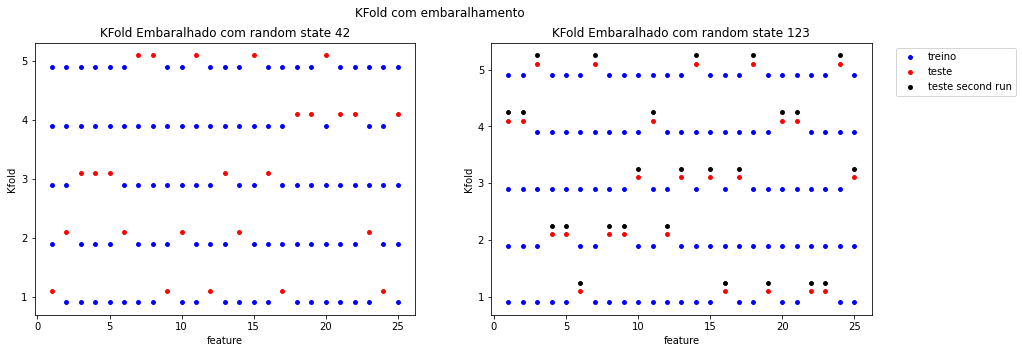

In [10]:
train42, test42 = kfoldize(kf42,rn)
train123, test123 = kfoldize(kf123,rn)
train123_2, test123_2 = kfoldize(kf123,rn,shift=.25)

fig,ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(x="x",y="val",c="b",label="treino",s=15,data=train42) 
ax[0].scatter(x="x",y="val",c="r",label="teste",s=15,data=test42)
ax[1].scatter(x="x",y="val",c="b",label="treino",s=15,data=train123)
ax[1].scatter(x="x",y="val",c="r",label="teste",s=15,data=test123)
ax[1].scatter(x="x",y="val",c="k",label="teste second run",s=15,data=test123_2)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[0].set_title("KFold Embaralhado com random state 42")
ax[1].set_ylabel("Kfold")
ax[1].set_xlabel("feature")
ax[1].set_title("KFold Embaralhado com random state 123")
plt.suptitle("KFold com embaralhamento")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## Kfold sobre dataset real
Vamos usar o Kfold para avaliar um modelo de classificação no popular conjunto de dados Iris. Contém 150 medidas de tamanhos de pétalas e sépalas das três variedades de flores de íris - setosa, versicolor e virginica. Cada um contém 50 medições no conjunto.

Conjunto de dados Iris no scikit-learn: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [11]:
iris = load_iris(return_X_y=False)
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
features = iris['feature_names']
iris_df['target'] = iris.target
iris_df["target_name"] = iris_df['target'].map({i:name for i,name in enumerate(iris.target_names)})
iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
147,6.5,3.0,5.2,2.0,2,virginica
19,5.1,3.8,1.5,0.3,0,setosa
128,6.4,2.8,5.6,2.1,2,virginica
12,4.8,3.0,1.4,0.1,0,setosa
32,5.2,4.1,1.5,0.1,0,setosa


In [12]:
# Vamos ver quantas amostras de cada tipo de íris temos em nosso conjunto
pd.DataFrame(iris_df.groupby("target_name").size().reset_index()).rename(columns={0:"samples"})

,target_name,samples
0,setosa,50
1,versicolor,50
2,virginica,50


### Single fold
Vamos executar a regressão logística usando o train_test_split tradicional, que dividirá os dados em conjunto de treino e teste, para que cada valor alvo apareça no conjunto de treinamento e teste número semelhante de vezes.

In [13]:
# inicializa modelo

'''
solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algoritmo usado na otimização do problema.

No aprendizado de máquina, a classificação multiclasse ou multinomial é o problema de classificar instâncias em uma das três 
ou mais classes (classificar instâncias em uma das duas classes é chamado de classificação binária).
Embora muitos algoritmos de classificação (principalmente a regressão logística multinomial) permitam naturalmente o uso de
mais de duas classes, alguns são por natureza algoritmos binários; estes podem, no entanto, 
ser transformados em classificadores multinomiais por uma variedade de estratégias.
A classificação de várias classes não deve ser confundida com a classificação de vários rótulos, onde vários rótulos devem 
ser previstos para cada instância.
'''

model = LogisticRegression(solver="liblinear", multi_class="auto")

In [14]:
# Regressão logística sem Kfold, dividida em 80% de treino e 20% de teste
X = iris_df[features]
y = iris_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [15]:
#treina o modelo
model.fit(X_train, y_train) #treinando o modelo
pd.DataFrame({"Precisão no treino":[accuracy_score(y_train, model.predict(X_train))],
    "Precisão no teste":[accuracy_score(y_test, model.predict(X_test))]})

,Precisão no treino,Precisão no teste
0,0.958333,1.0


### KFold

O método Kfold retorna a ordem das amostras escolhidas para os conjuntos de treino e teste em cada dobra. Em um dataframe do pandas, usamos a função .iloc para obter as linhas corretas. Como não dividi os dados em X (recursos) ey (destino), também tenho que usar .loc, para escolher as colunas corretas (.loc[:,features]) ou simplesmente escolher as colunas (['target'])

In [24]:
i = 1
for train_index, test_index in kf3.split(iris_df):
    X_train = iris_df.iloc[train_index].loc[:, features]
    X_test = iris_df.iloc[test_index][features]
    y_train = iris_df.iloc[train_index].loc[:,'target']
    y_test = iris_df.loc[test_index]['target']
        
    #Treina o modelo
    model.fit(X_train, y_train) #Treinando o modelo
    print(f"Precisão para o fold no. {i} no conjunto de teste: {accuracy_score(y_test, model.predict(X_test))}")
    i += 1

Precisão para o fold no. 1 no conjunto de teste: 0.0
Precisão para o fold no. 2 no conjunto de teste: 0.0
Precisão para o fold no. 3 no conjunto de teste: 0.0


Mas por que a precisão é cada dobra **0.0**? O motivo é a uniformidade das divisões. Como os dados são ordenados para que setosa apareça nas primeiras cinquenta linhas do conjunto de dados, seguidos por versicolor e virginica, alcançamos uma distribuição exclusiva do conjunto de treinamento, que não contém nenhum destino esperado no conjunto de teste. A maioria dos modelos de aprendizado de máquina não pode aprender a classificar-se em uma classe que nunca viu. Visível na terceira divisão

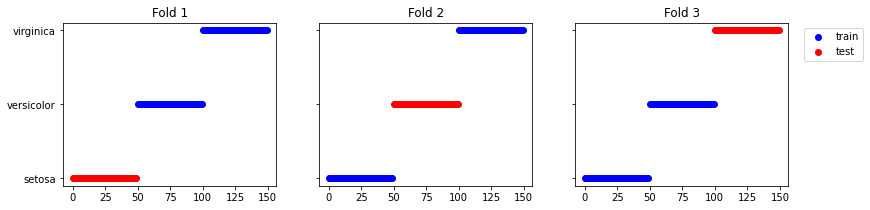

In [17]:
target_name = iris_df["target"]

fig, ax = plt.subplots(1,3, figsize=(13,3), sharey=True)
for i, (train_index, test_index) in enumerate(kf3.split(iris_df)):
    ax[i].scatter(x=train_index,y=target_name.iloc[train_index],label ="train", c='b')
    ax[i].scatter(x=test_index,y=target_name.iloc[test_index], label = "test", c='r')
    ax[i].set_title(f"Fold {i+1}")

ax[0].set_yticks([0,1,2])
ax[0].set_yticklabels(iris["target_names"])
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## KFold Embaralhado
Uma maneira de contornar esse problema é usar o Kfold embaralhado

In [18]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [23]:
dfs = []
kf = KFold(n_splits=3, shuffle=True, random_state=123)
i = 1

for train_index, test_index in kf.split(i = 1)

for train_index, test_index in kf.split(iris_df):
    X_train = iris_df.iloc[train_index].loc[:, features]
    X_test = iris_df.iloc[test_index].loc[:,features]
    y_train = iris_df.iloc[train_index].loc[:,'target']
    y_test = iris_df.loc[test_index].loc[:,'target']
    
    #Treina o modelo
    model.fit(X_train, y_train) #Treinando o modelo
    y_pred = model.predict(X_test)
    print(f"Precisão para o fold no. {i} no conjunto de teste: {accuracy_score(y_test, y_pred)}")
    
    # quantas ocorrências aparecem no conjunto de trens
    s_train = iris_df.iloc[train_index].loc[:,'target_name'].value_counts()
    s_train.name = f"train {i}"
    s_test = iris_df.iloc[test_index].loc[:,'target_name'].value_counts()
    s_test.name = f"test {i}"
    df = pd.concat([s_train, s_test], axis=1, sort=False)
    df["|"] = "|"
    dfs.append(df)
    
    i += 1):
    X_train = iris_df.iloc[train_index].loc[:, features]
    X_test = iris_df.iloc[test_index].loc[:,features]
    y_train = iris_df.iloc[train_index].loc[:,'target']
    y_test = iris_df.loc[test_index].loc[:,'target']
    
    #Treina o modelo
    model.fit(X_train, y_train) #Treinando o modelo
    y_pred = model.predict(X_test)
    print(f"Precisão para o fold no. {i} no conjunto de teste: {accuracy_score(y_test, y_pred)}")
    
    # quantas ocorrências aparecem no conjunto de trens
    s_train = iris_df.iloc[train_index].loc[:,'target_name'].value_counts()
    s_train.name = f"train {i}"
    s_test = iris_df.iloc[test_index].loc[:,'target_name'].value_counts()
    s_test.name = f"test {i}"
    df = pd.concat([s_train, s_test], axis=1, sort=False)
    df["|"] = "|"
    dfs.append(df)
    
    i += 1

SyntaxError: invalid syntax (<ipython-input-23-83202d91b228>, line 5)

In [ ]:
plt.scatter(x=y_train.index,y=iris_df.iloc[train_index].loc[:,'target_name'],label ="treino")
plt.scatter(x=y_test.index,y=iris_df.iloc[test_index].loc[:,'target_name'], label = "teste")
plt.legend()
plt.show()

Você pode ver que agora escolhemos amostras dos três tipos de íris, no entanto, algumas são escolhidas com mais frequência do que outras.

In [ ]:
pd.concat(dfs,axis=1, sort=False)

## Stratified KFold

Em vez de usar Kfold aleatório, podemos usar StratifiedKFold que precisa do parâmetro extra `y`. Como `y`, você usa a variável de destino para que o Kfold e escolha uma distribuição equilibrada dos destinos em cada folds.

In [ ]:
dfs = []
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)
i = 1
for train_index, test_index in kf.split(iris_df, iris_df["target"]):
    X_train = iris_df.iloc[train_index].loc[:, features]
    X_test = iris_df.iloc[test_index].loc[:,features]
    y_train = iris_df.iloc[train_index].loc[:,'target']
    y_test = iris_df.loc[test_index].loc[:,'target']

    #Train the model
    model.fit(X_train, y_train) #Training the model
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, model.predict(X_test))}, doublecheck: {model.score(X_test,y_test)}")
    
    # how many occurances appear in the train set
    s_train = iris_df.iloc[train_index].loc[:,'target_name'].value_counts()
    s_train.name = f"train {i}"
    s_test = iris_df.iloc[test_index].loc[:,'target_name'].value_counts()
    s_test.name = f"test {i}"
    df = pd.concat([s_train, s_test], axis=1, sort=False)
    df["|"] = "|"
    dfs.append(df)
    
    i += 1

In [ ]:
plt.scatter(x=y_train.index,y=iris_df.iloc[train_index].loc[:,'target_name'],label ="train")
plt.scatter(x=y_test.index,y=iris_df.iloc[test_index].loc[:,'target_name'], label = "test")
plt.legend()
plt.title("Shuffled stratified StratifiedKFold - 3rd Fold")
plt.show()

In [ ]:
pd.concat(dfs,axis=1, sort=False)

## Cross Validation sem KFold
Se você não quiser jogar com os dados divididos, não precisará fazer o KFolds, cross_validate ou cross_val_score treinará usando seus dados e o número preferido de divisões e fornecerá a pontuação no conjunto de testes.

In [25]:
# cross_validate permite especificar métricas que você deseja ver
for i, score in enumerate(cross_validate(model, X,y, cv=3)["test_score"]):
    print(f"Precisão para o fold no. {i} no conjunto de teste: {score}")

Precisão para o fold no. 0 no conjunto de teste: 0.96
Precisão para o fold no. 1 no conjunto de teste: 0.96
Precisão para o fold no. 2 no conjunto de teste: 0.94


In [ ]:
for i, score in enumerate(cross_val_score(model, X,y, cv=3)):
    print(f"Precisão para o fold no. {i} no conjunto de teste: {score}")

# Conclusão

Analisamos como os métodos Sklearn `Kfold` funcionam. Vemos que ele divide os dados no número n de conjuntos. Cada um dos recursos aparecerá uma vez no conjunto de testes e `n-1` vezes no conjunto de treinamento. 

No KFold regular, cada fold conterá valores `1/n` no conjunto de treinamento e valores `n-1/n` no conjunto de testes. Portanto, para `n=2` 50% estará no conjunto de testes,` n=3` 33%, `n=4` 25% etc.

Podemos dividir os dados na ordem em que eles aparecerem usando `shuffle=False` ou aleatoriamente com `shuffle=True` e opcionalmente declarando um `random_state`. Ter o mesmo estado aleatório sempre resultará na mesma divisão dos dados de teste e treino.

Você não precisa dividir seus dados manualmente e  pode aplicar `cross-validate`. Os dados serão divididos em segundo plano e você receberá a pontuação final.